This notebook will take the data that was cleaned in the 'Data_wrangling' notebook, and use it to for machine learning

# 1. Import packages

In [1]:
import pandas as pd 
import numpy as np

import sklearn as sk
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV
from sklearn.preprocessing import StandardScaler, RobustScaler,PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

import matplotlib.pyplot as plt
import seaborn as sns

import random
random.seed(123)

%matplotlib inline

# 2. Reading the data

In [2]:
airbnb_df=pd.read_csv("cleaned_data.csv")

In [3]:
airbnb_df.columns

Index(['Unnamed: 0', 'id', 'neighbourhood_cleansed', 'city', 'property_type',
       'accommodates', 'bathrooms', 'bedrooms', 'price', 'minimum_nights',
       'maximum_nights', 'availability_365', 'number_of_reviews',
       'host_is_superhost', 'has_wifi', 'has_kitchen', 'has_parking', 'has_tv',
       'has_washer', 'has_garden', 'has_balcony', 'geometry', 'LSOA11CD',
       'LSOA11NM', 'Index of Multiple Deprivation (IMD) Score',
       'median_house_price_2020', 'room_type_Entire home/apt',
       'room_type_Hotel room', 'room_type_Private room',
       'room_type_Shared room'],
      dtype='object')

In [4]:
airbnb_df=airbnb_df.drop(columns='Unnamed: 0')

In [5]:
airbnb_df

,id,neighbourhood_cleansed,city,property_type,accommodates,bathrooms,bedrooms,price,minimum_nights,maximum_nights,...,has_balcony,geometry,LSOA11CD,LSOA11NM,Index of Multiple Deprivation (IMD) Score,median_house_price_2020,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,27563570,Ancoats and Clayton,Manchester,Entire apartment,16,3.0,4.0,454.0,1,1125,...,0.0,POINT (384542.9281702386 398653.6695328624),E01033667,Manchester 054E,34.751,199275.0,1,0,0,0
1,36903049,City Centre,Manchester,Entire townhouse,16,5.0,8.0,404.0,1,1125,...,0.0,POINT (384389.1957887387 398520.6719592023),E01033667,Manchester 054E,34.751,199275.0,1,0,0,0
2,27153600,Ancoats and Clayton,Manchester,Entire apartment,16,2.0,3.0,640.0,1,1125,...,1.0,POINT (384592.6177058753 398831.5143757385),E01033667,Manchester 054E,34.751,199275.0,1,0,0,0
3,27041971,Ancoats and Clayton,Manchester,Entire apartment,16,2.0,3.0,439.0,1,1125,...,0.0,POINT (384586.1756508239 398890.5007268761),E01033667,Manchester 054E,34.751,199275.0,1,0,0,0
4,30371210,Ancoats and Clayton,Manchester,Entire apartment,16,2.0,3.0,454.0,1,1125,...,0.0,POINT (384548.3201326572 398880.6121883488),E01033667,Manchester 054E,34.751,199275.0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5501,13045494,Brooklands,Manchester,Private room in bed and breakfast,1,1.0,1.0,35.0,1,30,...,0.0,POINT (379630.8142576886 389088.8872426303),E01005069,Manchester 047A,16.903,230000.0,0,0,1,0
5502,13145680,Wigan District,Manchester,Private room in house,1,1.0,1.0,15.0,1,1125,...,0.0,POINT (355536.0732476194 405759.7163709552),E01006357,Wigan 010C,69.187,80000.0,0,0,1,0
5503,42651877,Oldham District,Manchester,Private room in townhouse,1,1.0,1.0,28.0,1,60,...,0.0,POINT (391400.0408553824 402735.8067752959),E01005382,Oldham 030D,56.193,123500.0,0,0,1,0
5504,30949762,Northenden,Manchester,Private room in house,1,1.0,1.0,45.0,1,1000,...,0.0,POINT (382464.1037050502 388905.0600582725),E01005085,Manchester 049A,55.840,123000.0,0,0,1,0


# 3. Exploratory data analysis

## 3.1. Distribution of price

C:\Python36\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Python36\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

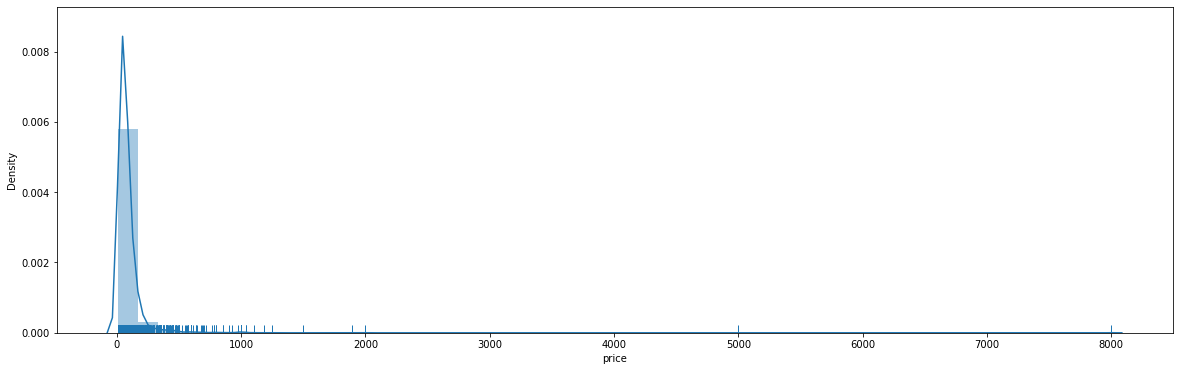

In [6]:
plt.figure(figsize=(20,6))
sns.distplot(airbnb_df['price'], rug=True)

## 3.2. Impact of factors on price

### 3.2.1. Property type 

<AxesSubplot:title={'center':'price'}, xlabel='property_type'>

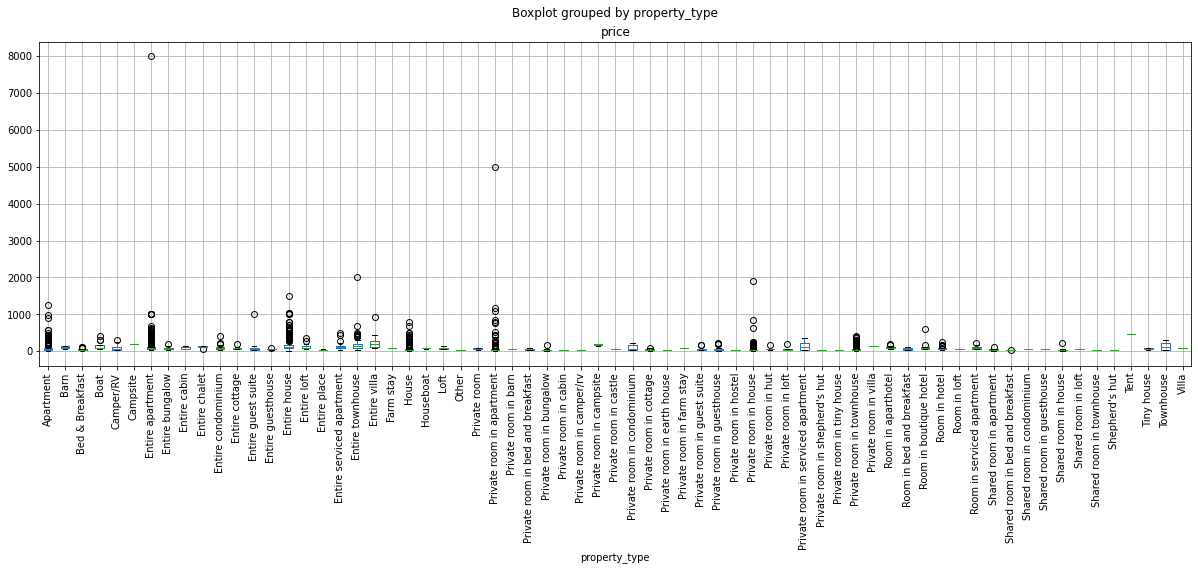

In [7]:
airbnb_df.boxplot(column='price', by='property_type', figsize=(20,6), rot=90)


I would have also done room type, but that's been encoded so can't plot it in a boxplot

### 3.2.2. Reviews

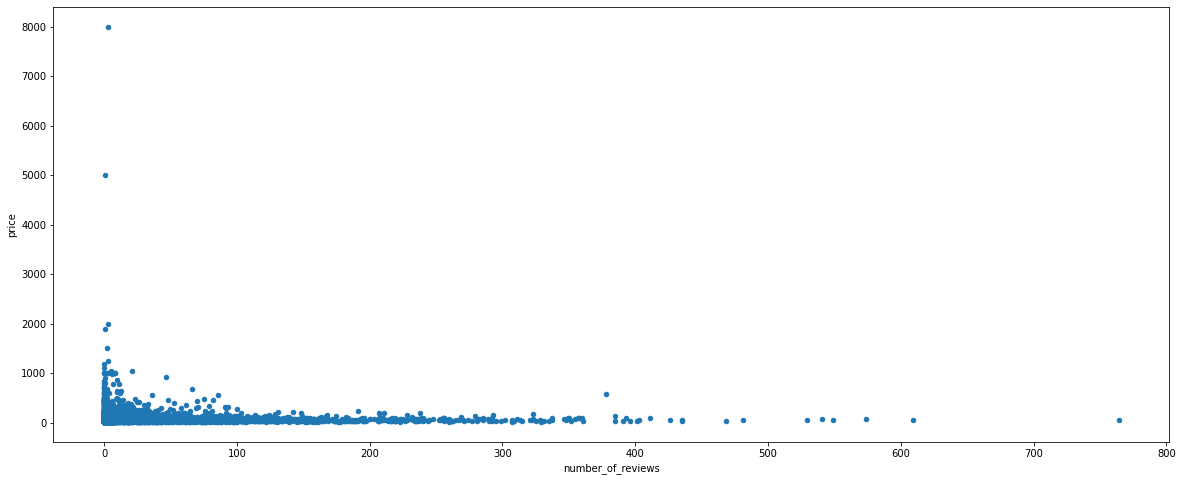

In [8]:
airbnb_df.plot.scatter(x='number_of_reviews', y='price', figsize=(20,8));


Looks almost logarithmic

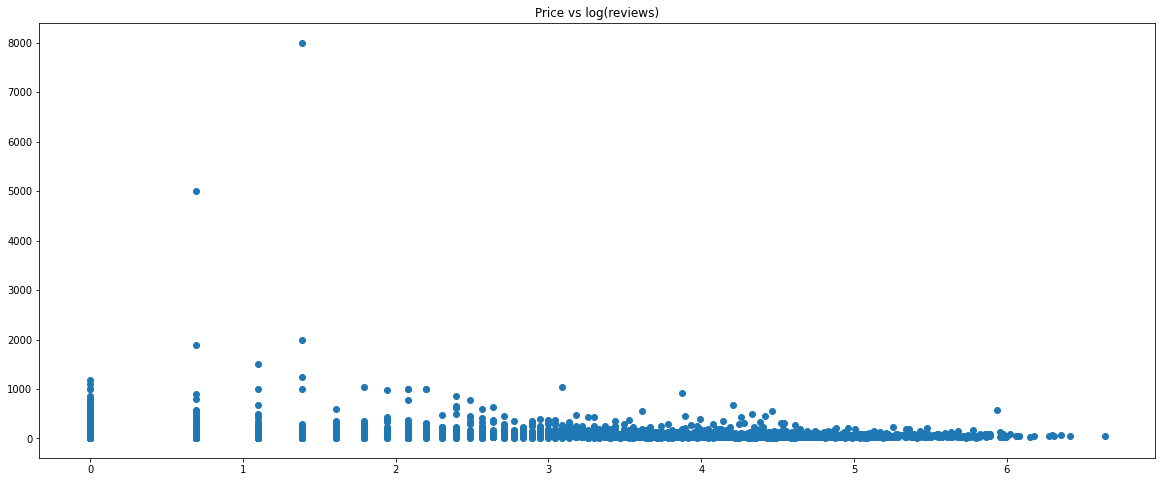

In [9]:
plt.figure(figsize=(20,8))
plt.scatter(np.log(1+airbnb_df['number_of_reviews']), airbnb_df['price'])
plt.title('Price vs log(reviews)');

### 3.2.3. Bathrooms, bedrooms and accomodates

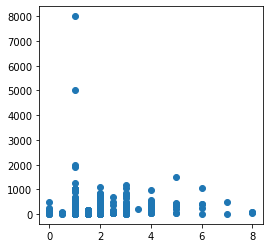

In [10]:
f, ax=plt.subplots(figsize=(4,4))

plt.scatter(x=airbnb_df['bathrooms'], y=airbnb_df['price'])




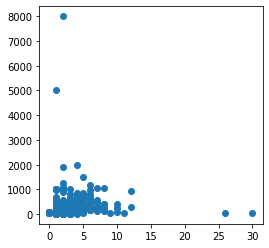

In [11]:
f, ax=plt.subplots(figsize=(4,4))

plt.scatter(x=airbnb_df['bedrooms'], y=airbnb_df['price'])



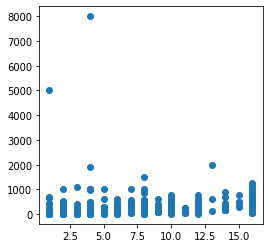

In [12]:
f, ax=plt.subplots(figsize=(4,4))

plt.scatter(x=airbnb_df['accommodates'], y=airbnb_df['price'])

# 4. Feature engineering

In [13]:
engineered_df=airbnb_df.copy()
engineered_df['logreviews']=np.log(1+ engineered_df['number_of_reviews']) #take the log of reviews


engineered_df=pd.get_dummies(engineered_df, columns=['city'])  #OHE the cities


In [14]:
engineered_df

,id,neighbourhood_cleansed,property_type,accommodates,bathrooms,bedrooms,price,minimum_nights,maximum_nights,availability_365,...,LSOA11NM,Index of Multiple Deprivation (IMD) Score,median_house_price_2020,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,logreviews,city_Bristol,city_Manchester
0,27563570,Ancoats and Clayton,Entire apartment,16,3.0,4.0,454.0,1,1125,309,...,Manchester 054E,34.751,199275.0,1,0,0,0,3.891820,0,1
1,36903049,City Centre,Entire townhouse,16,5.0,8.0,404.0,1,1125,321,...,Manchester 054E,34.751,199275.0,1,0,0,0,2.564949,0,1
2,27153600,Ancoats and Clayton,Entire apartment,16,2.0,3.0,640.0,1,1125,0,...,Manchester 054E,34.751,199275.0,1,0,0,0,2.639057,0,1
3,27041971,Ancoats and Clayton,Entire apartment,16,2.0,3.0,439.0,1,1125,323,...,Manchester 054E,34.751,199275.0,1,0,0,0,2.484907,0,1
4,30371210,Ancoats and Clayton,Entire apartment,16,2.0,3.0,454.0,1,1125,282,...,Manchester 054E,34.751,199275.0,1,0,0,0,2.708050,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5501,13045494,Brooklands,Private room in bed and breakfast,1,1.0,1.0,35.0,1,30,365,...,Manchester 047A,16.903,230000.0,0,0,1,0,3.761200,0,1
5502,13145680,Wigan District,Private room in house,1,1.0,1.0,15.0,1,1125,266,...,Wigan 010C,69.187,80000.0,0,0,1,0,4.234107,0,1
5503,42651877,Oldham District,Private room in townhouse,1,1.0,1.0,28.0,1,60,90,...,Oldham 030D,56.193,123500.0,0,0,1,0,0.693147,0,1
5504,30949762,Northenden,Private room in house,1,1.0,1.0,45.0,1,1000,90,...,Manchester 049A,55.840,123000.0,0,0,1,0,3.713572,0,1


# 5.Inital Model

In [15]:
engineered_df.columns

Index(['id', 'neighbourhood_cleansed', 'property_type', 'accommodates',
       'bathrooms', 'bedrooms', 'price', 'minimum_nights', 'maximum_nights',
       'availability_365', 'number_of_reviews', 'host_is_superhost',
       'has_wifi', 'has_kitchen', 'has_parking', 'has_tv', 'has_washer',
       'has_garden', 'has_balcony', 'geometry', 'LSOA11CD', 'LSOA11NM',
       'Index of Multiple Deprivation (IMD) Score', 'median_house_price_2020',
       'room_type_Entire home/apt', 'room_type_Hotel room',
       'room_type_Private room', 'room_type_Shared room', 'logreviews',
       'city_Bristol', 'city_Manchester'],
      dtype='object')

In [16]:
features=engineered_df.drop(columns=['id', 'property_type','geometry',
                                'LSOA11CD', 'LSOA11NM', 'price','number_of_reviews','neighbourhood_cleansed'])
target=engineered_df['price'] #select features and target

In [17]:
scaler=StandardScaler()

features_scaled=scaler.fit_transform(X=features) #scale features

X=features_scaled
y=target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [18]:
lr = LinearRegression()
alphas = [1000, 100, 50, 20, 10, 1, 0.1, 0.01]
l1_ratios = [0.001, 0.01, 0.05, 0.1, 0.3, 0.5, 0.7, 0.9]
ridge = RidgeCV(alphas=alphas)
lasso = LassoCV(alphas=alphas, max_iter=10000)
elastic = ElasticNetCV(alphas=alphas, l1_ratio=l1_ratios)

In [19]:
for model, name in zip([lr, ridge, lasso, elastic], ['LinearRegression', 'Ridge', 'Lasso', 'ElasticNet']):
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    mrse_train = np.sqrt(mean_squared_error(y_pred=y_pred_train, y_true=y_train))
    y_pred = model.predict(X_test)
    mrse_test = np.sqrt(mean_squared_error(y_pred=y_pred, y_true=y_test))
    best_alpha = ''
    if name != 'LinearRegression':
        best_alpha = ' best alpha: ' + str(model.alpha_)
    best_l1 = ''
    if name == 'ElasticNet':
        best_l1 = ' best l1: '+ str(model.l1_ratio_)
    print(name + ' mrse_train: ' + str(mrse_train) + ', mrse_test: ' + str(mrse_test) + best_alpha + best_l1)

LinearRegression mrse_train: 146.13178575829843, mrse_test: 162.81929999465558
Ridge mrse_train: 146.14157976973343, mrse_test: 162.89381931215715 best alpha: 100.0
Lasso mrse_train: 146.17800145880864, mrse_test: 162.95276797997423 best alpha: 1.0
ElasticNet mrse_train: 146.15116547187802, mrse_test: 162.96159296759205 best alpha: 0.1 best l1: 0.7


C:\Python36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2203432.163601637, tolerance: 10001.563104059042
  tol, rng, random, positive)
C:\Python36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 36915.58264230192, tolerance: 10001.563104059042
  tol, rng, random, positive)
C:\Python36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 22633.59409853816, tolerance: 10001.563104059042
  tol, rng, random, positive)
C:\Python36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dual

In [20]:
#knn regressor
grid_params= {
    'n_neighbors' :[1,3,5,7,9,12,14,20,40,60,80,100],
    'weights':['distance','uniform'],
    'metric': ['minkowski', 'euclidean','manhattan']
}

grid = GridSearchCV(KNeighborsRegressor(), grid_params, cv=3, verbose=1, n_jobs=-1)
grid_result = grid.fit(X_train, y_train)
print('Best Score: ', grid_result.best_score_)
print('Best estimator: ', grid_result.best_estimator_)
print('Best Params: ', grid_result.best_params_)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   15.5s


Best Score:  0.17828705198829195
Best estimator:  KNeighborsRegressor(metric='manhattan', n_neighbors=60, weights='distance')
Best Params:  {'metric': 'manhattan', 'n_neighbors': 60, 'weights': 'distance'}


[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:   18.1s finished


From these scores, it is not great. We have to do further adjustments. From previous experience, the model is unable to predict high prices and those with a low number of reviews, and some variables can be removed.

# 6. Improved modelling (Playing around with sampling and data)

In this section we will only keep airbnbs that have more than 5 reviews, clip high prices to 3 standard deviations and take an even sample of manchester and bristol

In [21]:
new_df=airbnb_df.copy()

In [22]:
new_df=new_df[new_df['number_of_reviews']>5] #doing this lost roughly 2400 reviews

In [23]:
new_df.describe()

,id,accommodates,bathrooms,bedrooms,price,minimum_nights,maximum_nights,availability_365,number_of_reviews,host_is_superhost,...,has_tv,has_washer,has_garden,has_balcony,Index of Multiple Deprivation (IMD) Score,median_house_price_2020,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
count,3.106000e+03,3106.000000,3106.000000,3106.000000,3106.000000,3106.000000,3106.000000,3106.000000,3106.000000,3106.000000,...,3106.000000,3106.000000,3106.000000,3106.000000,3106.000000,3.106000e+03,3106.000000,3106.000000,3106.000000,3106.000000
mean,2.223121e+07,3.450097,1.235190,1.541533,74.816484,2.473921,692.150354,198.739214,55.167740,0.416935,...,0.998068,0.998068,0.998068,0.200258,27.568357,2.536205e+05,0.535415,0.023181,0.433999,0.007405
std,1.272885e+07,2.503766,0.566636,0.998089,81.013610,7.199892,538.033632,127.526990,69.588539,0.493131,...,0.043916,0.043916,0.043916,0.400257,15.409628,1.123317e+05,0.498824,0.150502,0.495704,0.085747
min,3.952400e+04,1.000000,0.000000,0.000000,11.000000,1.000000,1.000000,0.000000,6.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,2.403000,5.100000e+04,0.000000,0.000000,0.000000,0.000000
25%,1.063311e+07,2.000000,1.000000,1.000000,35.000000,1.000000,49.250000,83.000000,14.000000,0.000000,...,1.000000,1.000000,1.000000,0.000000,15.672000,1.700000e+05,0.000000,0.000000,0.000000,0.000000
50%,2.261086e+07,2.000000,1.000000,1.000000,55.000000,1.000000,1125.000000,180.000000,30.000000,0.000000,...,1.000000,1.000000,1.000000,0.000000,24.805000,2.300000e+05,1.000000,0.000000,0.000000,0.000000
75%,3.330517e+07,4.000000,1.000000,2.000000,87.000000,2.000000,1125.000000,330.000000,67.000000,1.000000,...,1.000000,1.000000,1.000000,0.000000,36.303000,3.147500e+05,1.000000,0.000000,1.000000,0.000000
max,4.536894e+07,16.000000,8.000000,12.000000,1037.000000,182.000000,10000.000000,365.000000,764.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,77.768000,1.195000e+06,1.000000,1.000000,1.000000,1.000000


Mean Price+3 standrd deviations= 317.

In [24]:
new_df['price']=np.clip(new_df['price'], 15, 317)  #clip very high and very low values

In [25]:
new_df

,id,neighbourhood_cleansed,city,property_type,accommodates,bathrooms,bedrooms,price,minimum_nights,maximum_nights,...,has_balcony,geometry,LSOA11CD,LSOA11NM,Index of Multiple Deprivation (IMD) Score,median_house_price_2020,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,27563570,Ancoats and Clayton,Manchester,Entire apartment,16,3.0,4.0,317.0,1,1125,...,0.0,POINT (384542.9281702386 398653.6695328624),E01033667,Manchester 054E,34.751,199275.0,1,0,0,0
1,36903049,City Centre,Manchester,Entire townhouse,16,5.0,8.0,317.0,1,1125,...,0.0,POINT (384389.1957887387 398520.6719592023),E01033667,Manchester 054E,34.751,199275.0,1,0,0,0
2,27153600,Ancoats and Clayton,Manchester,Entire apartment,16,2.0,3.0,317.0,1,1125,...,1.0,POINT (384592.6177058753 398831.5143757385),E01033667,Manchester 054E,34.751,199275.0,1,0,0,0
3,27041971,Ancoats and Clayton,Manchester,Entire apartment,16,2.0,3.0,317.0,1,1125,...,0.0,POINT (384586.1756508239 398890.5007268761),E01033667,Manchester 054E,34.751,199275.0,1,0,0,0
4,30371210,Ancoats and Clayton,Manchester,Entire apartment,16,2.0,3.0,317.0,1,1125,...,0.0,POINT (384548.3201326572 398880.6121883488),E01033667,Manchester 054E,34.751,199275.0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5500,12882408,Brooklands,Manchester,Private room in bed and breakfast,1,1.0,1.0,39.0,1,30,...,0.0,POINT (379699.914613151 389230.9947791573),E01005113,Manchester 047C,57.644,155000.0,0,0,1,0
5501,13045494,Brooklands,Manchester,Private room in bed and breakfast,1,1.0,1.0,35.0,1,30,...,0.0,POINT (379630.8142576886 389088.8872426303),E01005069,Manchester 047A,16.903,230000.0,0,0,1,0
5502,13145680,Wigan District,Manchester,Private room in house,1,1.0,1.0,15.0,1,1125,...,0.0,POINT (355536.0732476194 405759.7163709552),E01006357,Wigan 010C,69.187,80000.0,0,0,1,0
5504,30949762,Northenden,Manchester,Private room in house,1,1.0,1.0,45.0,1,1000,...,0.0,POINT (382464.1037050502 388905.0600582725),E01005085,Manchester 049A,55.840,123000.0,0,0,1,0


In [26]:
#now to take an even sample of bristol and manchester airbnbs
even_sample_df=new_df.groupby('city').apply(lambda x: x.sample(800)) #tale 400 of each city
even_sample_df=even_sample_df.reset_index(drop='city')

In [27]:
#now to copy the feature engineering we did
even_sample_df['logreviews']=np.log(1+ even_sample_df['number_of_reviews']) #take the log of reviews


even_sample_df=pd.get_dummies(even_sample_df, columns=['city'])  #OHE the cities

In [28]:
even_sample_df

,id,neighbourhood_cleansed,property_type,accommodates,bathrooms,bedrooms,price,minimum_nights,maximum_nights,availability_365,...,LSOA11NM,Index of Multiple Deprivation (IMD) Score,median_house_price_2020,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,logreviews,city_Bristol,city_Manchester
0,23342066,Easton,Entire apartment,3,1.0,1.0,48.0,1,5,22,...,Bristol 057C,24.343,317000.0,1,0,0,0,3.295837,1,0
1,24388910,Central,Entire serviced apartment,4,1.0,1.0,106.0,2,640,123,...,Bristol 032B,22.838,390000.0,1,0,0,0,2.302585,1,0
2,17247211,Ashley,Private room in apartment,2,1.0,1.0,42.0,1,1125,79,...,Bristol 020A,16.847,317500.0,0,0,1,0,3.737670,1,0
3,22666598,Clifton,Room in loft,2,1.0,1.0,63.0,1,1125,358,...,Bristol 034D,15.351,317500.0,0,1,0,0,4.521789,1,0
4,13086182,Central,Private room in hostel,2,2.0,1.0,31.0,1,1125,314,...,Bristol 032B,22.838,390000.0,0,0,1,0,5.003946,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,40306618,Gorton South,Entire house,9,2.0,4.0,80.0,2,1125,127,...,Manchester 021E,38.916,145000.0,1,0,0,0,2.079442,0,1
1596,37481049,Stockport District,Entire house,4,1.0,2.0,105.0,2,1125,313,...,Stockport 027C,7.432,310000.0,1,0,0,0,2.833213,0,1
1597,6804341,Ancoats and Clayton,Apartment,8,1.0,3.0,150.0,1,1125,277,...,Manchester 054D,26.431,195500.0,1,0,0,0,2.639057,0,1
1598,28580121,Ancoats and Clayton,Entire apartment,6,1.0,2.0,65.0,1,1125,65,...,Manchester 054E,34.751,199275.0,1,0,0,0,3.761200,0,1


In [29]:
features=even_sample_df.drop(columns=['id', 'property_type','geometry',
                                'LSOA11CD', 'LSOA11NM', 'price','number_of_reviews','neighbourhood_cleansed',
                                 'minimum_nights', 'maximum_nights', 'availability_365'])
target=even_sample_df['price'] #select features and target

In [30]:
scaler=StandardScaler()

features_scaled=scaler.fit_transform(X=features) #scale features

X=features_scaled
y=target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [31]:
for model, name in zip([lr, ridge, lasso, elastic], ['LinearRegression', 'Ridge', 'Lasso', 'ElasticNet']):
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    mrse_train = np.sqrt(mean_squared_error(y_pred=y_pred_train, y_true=y_train))
    y_pred = model.predict(X_test)
    mrse_test = np.sqrt(mean_squared_error(y_pred=y_pred, y_true=y_test))
    best_alpha = ''
    if name != 'LinearRegression':
        best_alpha = ' best alpha: ' + str(model.alpha_)
    best_l1 = ''
    if name == 'ElasticNet':
        best_l1 = ' best l1: '+ str(model.l1_ratio_)
    print(name + ' mrse_train: ' + str(mrse_train) + ', mrse_test: ' + str(mrse_test) + best_alpha + best_l1)

LinearRegression mrse_train: 33.22642643710293, mrse_test: 34.24153101332466
Ridge mrse_train: 33.232010517210085, mrse_test: 34.17479176354784 best alpha: 20.0
Lasso mrse_train: 33.2266603416797, mrse_test: 34.25456641484513 best alpha: 0.1
ElasticNet mrse_train: 33.2302882586338, mrse_test: 34.20817515712556 best alpha: 0.1 best l1: 0.9


In [32]:
#knn regressor
grid_params= {
    'n_neighbors' :[1,3,5,7,9,12,14,20,40,60,80,100],
    'weights':['distance','uniform'],
    'metric': ['minkowski', 'euclidean','manhattan']
}

grid = GridSearchCV(KNeighborsRegressor(), grid_params, cv=3, verbose=1, n_jobs=-1)
grid_result = grid.fit(X_train, y_train)
print('Best Score: ', grid_result.best_score_)
print('Best estimator: ', grid_result.best_estimator_)
print('Best Params: ', grid_result.best_params_)

#knn is our most accurate model, lets see the root mean squared error
knn= grid_result.best_estimator_

knn=knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

mse= mean_squared_error(y_test, y_pred)
rmse=mse**(1/2)
rmse   

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.3s


Best Score:  0.5756470479773655
Best estimator:  KNeighborsRegressor(n_neighbors=7, weights='distance')
Best Params:  {'metric': 'minkowski', 'n_neighbors': 7, 'weights': 'distance'}


[Parallel(n_jobs=-1)]: Done 201 out of 216 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:    1.4s finished


36.02391230092311

MRSE is much lower now. However, next I'm going to run some model diagnostics on it, so where the model is underperforming and then use it on the unused data set using this ridge model below

In [33]:
ridge= Ridge(alpha=10)

ridge=ridge.fit(X_train, y_train) 

# 6.1. Model diagnostics

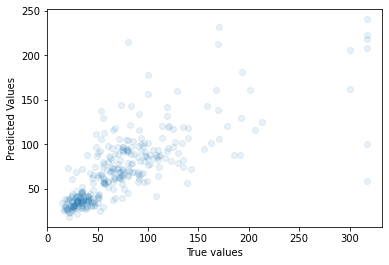

In [34]:
#plotting true vs predicted
plt.scatter(y_test,y_pred,alpha=0.1)
plt.ylabel("Predicted Values")
plt.xlabel("True values")
plt.xlim(xmin=0)
plt.show()  #underpredicting??

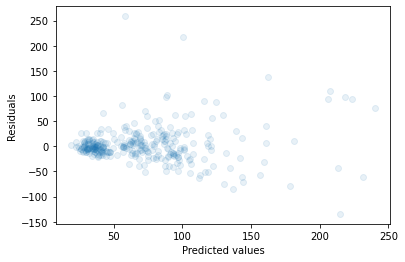

In [35]:
#plotting residuals
residuals = y_test-y_pred
plt.scatter(y_pred,residuals, alpha=0.1)
plt.ylabel("Residuals")
plt.xlabel("Predicted values")


plt.show()  #looks fairly balanced but tending to overpredict more?

# 6.2. Testing new model on data that was left out

Our sample was essentially taken from the engineered dataset. We will first concat the sampled data and then remove the duplicate id and use that as a test set.

In [36]:
test_data=pd.concat([even_sample_df, engineered_df])

In [37]:
test_data=test_data[test_data['number_of_reviews']>5] #model does not perform well on data with no reviews

In [38]:
test_data=test_data.drop_duplicates(subset='geometry', keep=False) #remove duplicates as that data is what the model is trained on

#used geometry in case ids from manchester and bristol overlapped

In [39]:
test_features=test_data.drop(columns=['id', 'property_type','geometry',
                                'LSOA11CD', 'LSOA11NM', 'price','number_of_reviews','neighbourhood_cleansed',
                                 'minimum_nights', 'maximum_nights', 'availability_365'])
test_target=test_data['price'] #select features and target

In [40]:
scaler=StandardScaler()

test_features_scaled=scaler.fit_transform(X=test_features) #scale features

X=test_features_scaled
y=test_target


In [41]:
y_pred = ridge.predict(X)  #use ridge model from earlier

mse= mean_squared_error(y, y_pred)
rmse=mse**(1/2)
rmse   

56.12776595441675

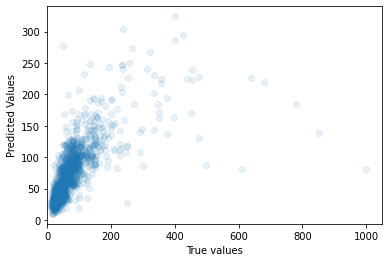

In [42]:
#plotting true vs predicted
plt.scatter(y,y_pred,alpha=0.1)
plt.ylabel("Predicted Values")
plt.xlabel("True values")
plt.xlim(xmin=0)
plt.show()  #underpredicting??

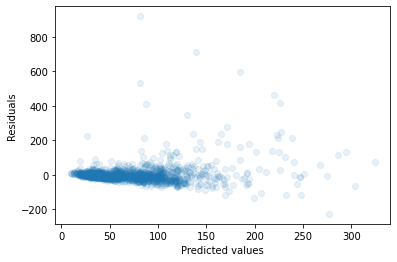

In [43]:
#plotting residuals
residuals = y-y_pred
plt.scatter(y_pred,residuals, alpha=0.1)
plt.ylabel("Residuals")
plt.xlabel("Predicted values")


plt.show()  #underpredicting

# 6.2.1. Testing on data with price less than 300

In [44]:
test_data_under300=test_data[test_data['price']<=300]

In [45]:
under_300_features=test_data_under300.drop(columns=['id', 'property_type','geometry',
                                'LSOA11CD', 'LSOA11NM', 'price','number_of_reviews','neighbourhood_cleansed',
                                 'minimum_nights', 'maximum_nights', 'availability_365'])

under_300_target=test_data_under300['price'] #select features and target

scaler=StandardScaler()

under_300_features_scaled=scaler.fit_transform(X=under_300_features) #scale features

X=under_300_features_scaled
y=under_300_target


y_pred = ridge.predict(X)  #use ridge model from earlier

mse= mean_squared_error(y, y_pred)
rmse=mse**(1/2)
rmse   

31.160080184276044

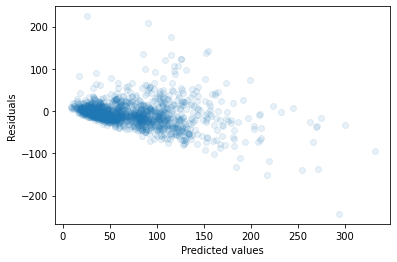

In [46]:
#plotting residuals
residuals = y-y_pred
plt.scatter(y_pred,residuals, alpha=0.1)
plt.ylabel("Residuals")
plt.xlabel("Predicted values")


plt.show()  

Looks like it is difficult to predict very high values of airbnbs, so the model tends to underestimate. Is this because people are ovepricing their airbnbs, as we have to remember people set their own prices for airbnbs? Furthermore, our dataset provides no indicates, thus, seasonal variations can't be taken into account, which may be contributing to lower level of accuracy.

However, we can take comfort in the fact that our RMSE for our testing and training set is pretty similar at 31, which shows the model hasnt been overfitted but leaning more towards underfitting.